# 0.0 Imports

In [1]:
from IPython.display import Image
from IPython.display import Audio
from IPython.display import HTML

from bs4 import BeautifulSoup
import requests
import pandas as pd
from datetime import datetime
import numpy as np
import inflection

from urllib.request import urlopen
from urllib.error import URLError, HTTPError
from urllib.request import urlretrieve
import os

# 1.0 Projeto Final

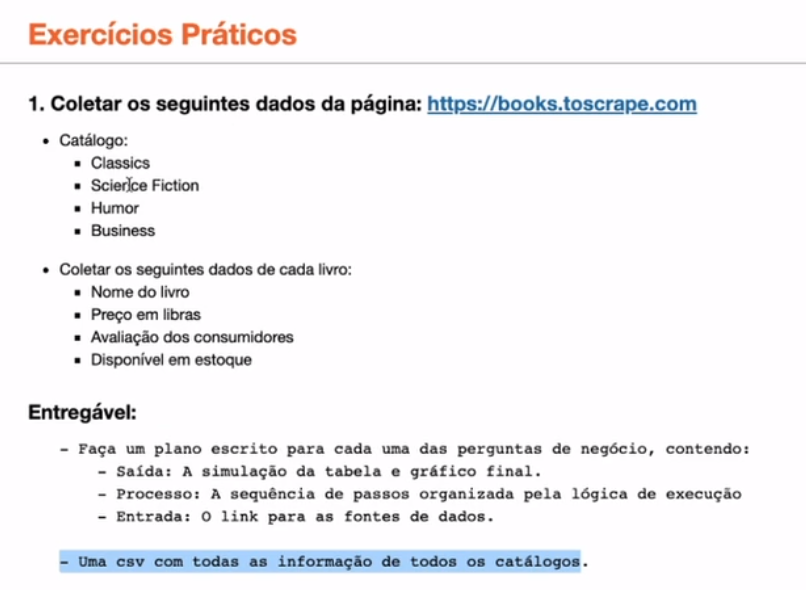

In [2]:
Image('/home/deivison/Documentos/projetos/python_ds_ao_dev/imagem/exercicio_final.png')

# 1.1 Projeto Final - Extendido (Coletar todos os livros e imagens das capas)

In [3]:
#https://books.toscrape.com/
url = 'https://books.toscrape.com/'
url

'https://books.toscrape.com/'

# 2.0 Plano

In [4]:
# Saidas
#     tabela no pandas
#         colunas com atributos dos livros
#             catalogo nome preco avaliacao estoque hora
#         Linhas
#             livros
#     Arquivo csv
#     Pasta organizada com as imagens de todas as capas do livros por catalogo

# processo 
#     webscraping 
#         coletar informacoes de 1 livro em catalogo classics
#         coletar informacoes de todos livros em 1 pagina
#         coletar informacoes de todas as paginas dentro de catalogo classics
#         salvar dataframe classics
#         Coletar imagens das capas
#         replicar a coleta para os outros catalogos
#         juntar dataframes catalogos
#         converter dataframe em csv
        

# 3.0 Webscraping

## 3.1 Webscraping Todos os Livros 

In [5]:
def coleta_livros(url2,catalogo):
    #endereco sessao catalogo
    url_def = url2
    # Dicionario que informa ao end point da API que quem ta fazendo a requisicao é um browser e não um codigo em python
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5), AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

    # fazer requisicao na API
    page_def = requests.get( url_def, headers = headers )

    # instanciar texto da pagina como objeto do Beautiful soup
    soup = BeautifulSoup( page_def.text, 'html.parser')


    # Salvando toda a pagina da vitrine como um objeto bs4
    vitrine = soup.find('div', class_='col-sm-8 col-md-9')

    # Salvando todos os livros da vitrine  como um objeto bs4
    livros = vitrine.find_all('li', class_='col-xs-6 col-sm-4 col-md-3 col-lg-3')

    #### 3.1.2.1 Name

    # Para acessar todos os nomes dos livros é necessario percorrer a lista
    livros_name = [ p.find( 'h3').get_text() for p in livros ]


    #### 3.1.2.2 Price

    livros_price = [ p.find( 'p', class_='price_color').get_text().replace('Â£','') for p in livros ]

    #### 3.1.2.3 Avalicao

    livros_avaliacao = [ str(p.find( 'i', class_='icon-star').find_parent() ).split()[2].replace('">','') for p in livros ]

    #### 3.1.2.4 Estoque

    livros_estoque = [ p.find( 'p', class_='instock availability').get_text().replace('\n','').strip() for p in livros]
    
    #coletar imagem
    for p in livros:
    
#     face = [p.find('div',class_='image_container').img.get('src').strip('/').replace('../../../../','/') for p in livros]
#     for i in range ( len(face)):
        capas = p.find('div',class_='image_container').img
        cap = capas.get('src').strip('/').replace('../../../../','/')
        urlretrieve('https://books.toscrape.com/'+ cap ,  '/home/deivison/Documentos/projetos/python_ds_ao_dev/capas_livros/' + str(catalogo) + '/' + capas.get('src').split('/')[-1])

    return pd.DataFrame([livros_name,livros_price,livros_avaliacao,livros_estoque]).T

In [6]:
# COLETAR NOMES DE TODOS OS CATALOGOS

#endereco geral 
url = 'https://books.toscrape.com/index.html'

# Dicionario que informa ao end point da API que quem ta fazendo a requisicao é um browser e não um codigo em python
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5), AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

# fazer requisicao na API
page = requests.get( url, headers = headers )

# instanciar texto da pagina como objeto do Beautiful soup
soup = BeautifulSoup( page.text, 'html.parser')

# Lista de todos nomes das categorias dos catalogos da vitrine
vitrines = soup.find('aside', class_='sidebar col-sm-4 col-md-3')
lista_vitrine = vitrines.get_text().strip().replace(' ','').replace('and','-and').split()
list_underscore = lambda x: inflection.underscore(x)
lista_vitrine = list(map(list_underscore,lista_vitrine) )
lista_vitrine[17] = 'add_a_comment'
list_dasherize = lambda x: inflection.dasherize(x)
lista_vitrine = list( map(list_dasherize,lista_vitrine) )

#criar as pastas para armazenar as capas dos livros
for i in range( len(lista_vitrine)):
    path = '/home/deivison/Documentos/projetos/python_ds_ao_dev/capas_livros/'+ str(lista_vitrine[i])+'/'
    os.mkdir(path)

# COLETA DE TODOS OS LIVROS DE CADA CATALOGO

#criando dataframes dos resultados das coletas
final_df = pd.DataFrame()
df_catalogos = pd.DataFrame()

#coleta todas as categorias de cada catalogo
aux1 = []

#Dataframe padrao que recebe nome de todas as colunas
cols = ['name', 'price','avaliacao', 'estoque', 'category']
df_padrao = pd.DataFrame( columns = cols)

#Estrutura de repeticao entre os catalogos e paginas do site
for i in range( 1, ( len(lista_vitrine)) ):
    
    #endereco da primeira pagina de cada catalogo
    url2 = 'https://books.toscrape.com/catalogue/category/books/'+ str( lista_vitrine[i] ) + '_'+ str(i+1) +'/index.html'
          
    #endereco sessao corrente do catalogo
    url = url2
    # Dicionario que informa ao end point da API que quem ta fazendo a requisicao é um browser e não um codigo em python
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5), AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

    # fazer requisicao na API
    page = requests.get( url, headers = headers )

    # instanciar texto da pagina como objeto do Beautiful soup
    soup = BeautifulSoup( page.text, 'html.parser')
    
    #funcao que coleta informacoes dentro da primeira pagina do catalogo corrente
    df_catalogos = coleta_livros(url2,lista_vitrine[i])
    col = ['name','price','avaliacao','estoque']
    df_catalogos.columns = col
    category = str( lista_vitrine[i] )
    df_catalogos['category'] = category
    final_df = pd.concat( [final_df, df_catalogos]).reset_index(drop = True)
    
    #garantir que todos os dados foram coletados e preenchidos com vazios quando necessario
    final_df = pd.concat([df_padrao,final_df], axis = 0)
    aux1 = aux1 + final_df.columns.tolist()
    
    # Verifica se catalogo corrente possui mais de uma pagina de livros (há catalogos com mais de uma pagina)
    if int (soup.find('form',class_='form-horizontal').find_next().find_next().get_text()) > 20 :
        
        #determina a quantidade de paginas existentes em funcao da quantidade de livros do catalogo (cada pagina max 20 livros)
        paginas = int( np.ceil( (int(soup.find('form',class_='form-horizontal').get_text().split()[0]) / 20) ) )
        
        #Estrutura de repeticao entre as paginas internas do catalogo corrente (há catalogos com mais de uma pagina)
        for j in range( 1, (paginas) ):
            
            #endereco da pagina adicional do catalogo corrente
            url2 = 'https://books.toscrape.com/catalogue/category/books/'+ str( lista_vitrine[i] ) + '_'+ str(i+1) +'/page-'+str(j+1)+'.html'          
            
            #funcao que coleta informacoes dentro da pagina do catalogo corrente
            df_catalogos = coleta_livros(url2, lista_vitrine[i] )
            col = ['name','price','avaliacao','estoque']
            df_catalogos.columns = col
            #inclui a categoria do catalogo
            category = str( lista_vitrine[i] )
            df_catalogos['category'] = category
            final_df = pd.concat( [final_df, df_catalogos]).reset_index(drop = True)
            #garantir que todos os dados foram coletados e preenchidos com vazios quando necessario
            final_df = pd.concat([df_padrao,final_df], axis = 0)
            
#         #procedimento de coleta de todas as colunas dos livros do site    
#         aux1 = aux1 + final_df.columns.tolist()
#         aux1
#         set( aux1)
            

## 3.2 Verificação das Informações Coletadas

In [7]:
final_df['category'].value_counts()

default               152
nonfiction            110
sequential-art         75
add-a-comment          67
fiction                65
young-adult            54
fantasy                48
romance                35
mystery                32
food-and-drink         30
childrens              29
historical-fiction     26
poetry                 19
classics               19
history                18
womens-fiction         17
horror                 17
science-fiction        16
science                14
music                  13
business               12
travel                 11
thriller               11
philosophy             11
humor                  10
autobiography           9
art                     8
religion                7
psychology              7
spirituality            6
new-adult               6
christian-fiction       6
self-help               5
sports-and-games        5
biography               5
health                  4
contemporary            3
christian               3
politics    

In [8]:
final_df.shape

(1000, 5)

In [9]:
final_df.sample(50)

,name,price,avaliacao,estoque,category
328,The Five Love Languages: ...,31.05,Three,In stock,nonfiction
984,(Un)Qualified: How God Uses ...,54.00,Five,In stock,christian
44,Forever and Forever: The ...,29.69,Three,In stock,historical-fiction
727,Darkfever (Fever #1),56.02,One,In stock,fantasy
211,Keep Me Posted,20.46,Four,In stock,womens-fiction
433,Travels with Charley: In ...,57.82,Five,In stock,nonfiction
221,Something Borrowed (Darcy & ...,48.96,Five,In stock,womens-fiction
737,Myriad (Prentor #1),58.75,Four,In stock,fantasy
695,Avatar: The Last Airbender: ...,28.09,Two,In stock,fantasy
645,One with You (Crossfire ...,15.71,Four,In stock,add-a-comment


In [10]:
final_df.head(50)

,name,price,avaliacao,estoque,category
0,It's Only the Himalayas,45.17,Two,In stock,travel
1,Full Moon over Noahâs ...,49.43,Four,In stock,travel
2,See America: A Celebration ...,48.87,Three,In stock,travel
3,Vagabonding: An Uncommon Guide ...,36.94,Two,In stock,travel
4,Under the Tuscan Sun,37.33,Three,In stock,travel
5,A Summer In Europe,44.34,Two,In stock,travel
6,The Great Railway Bazaar,30.54,One,In stock,travel
7,A Year in Provence ...,56.88,Four,In stock,travel
8,The Road to Little ...,23.21,One,In stock,travel
9,Neither Here nor There: ...,38.95,Three,In stock,travel


## 3.3 CSV do Web Scraping

In [ ]:
#final_df.to_csv('/home/deivison/Documentos/projetos/python_ds_ao_dev/dataset/df_todos_livros.csv')